In [11]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [12]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/home/nastya/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [13]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/home/nastya/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/nastya/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/nastya/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/nastya/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [14]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [15]:
X_train = X_train.float()
X_test = X_test.float()

In [16]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [17]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

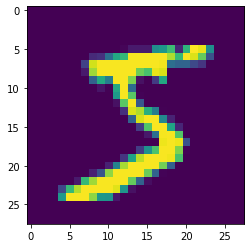

tensor(5)


In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [19]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [20]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [21]:
# torch.cuda.is_available()

In [22]:
# !nvidia-smi

In [23]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# mnist_net = mnist_net.to(device)
# list(mnist_net.parameters())

In [24]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [27]:
batch_size = 100

# test_accuracy_history = []
# test_loss_history = []

# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
#     test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
#     test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9606)
tensor(0.9614)
tensor(0.9615)
tensor(0.9604)
tensor(0.9613)
tensor(0.9629)
tensor(0.9626)
tensor(0.9631)
tensor(0.9623)
tensor(0.9621)
tensor(0.9636)
tensor(0.9623)
tensor(0.9648)
tensor(0.9621)
tensor(0.9612)
tensor(0.9616)
tensor(0.9598)
tensor(0.9633)
tensor(0.9630)
tensor(0.9620)
tensor(0.9618)
tensor(0.9618)
tensor(0.9605)
tensor(0.9618)
tensor(0.9622)
tensor(0.9597)
tensor(0.9615)
tensor(0.9641)
tensor(0.9638)
tensor(0.9637)
tensor(0.9646)
tensor(0.9616)
tensor(0.9635)
tensor(0.9660)
tensor(0.9661)
tensor(0.9656)
tensor(0.9659)
tensor(0.9641)
tensor(0.9644)
tensor(0.9653)
tensor(0.9635)
tensor(0.9642)
tensor(0.9644)
tensor(0.9641)
tensor(0.9630)
tensor(0.9658)
tensor(0.9621)
tensor(0.9641)
tensor(0.9645)
tensor(0.9648)
tensor(0.9656)
tensor(0.9652)
tensor(0.9628)
tensor(0.9661)
tensor(0.9614)
tensor(0.9639)
tensor(0.9650)
tensor(0.9654)
tensor(0.9659)
tensor(0.9648)
tensor(0.9638)
tensor(0.9638)
tensor(0.9650)
tensor(0.9644)
tensor(0.9643)
tensor(0.9629)
tensor(0.9

KeyboardInterrupt: 

In [ ]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);

In [31]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
x= MNIST_train.train_data
x= x.float()

x.shape

torch.Size([60000, 28, 28])

In [35]:
x.reshape(len(x[1]), len(x), len(x[2])).shape

torch.Size([28, 60000, 28])

In [36]:
import torch

from torch import nn

conv = nn.Conv2d(1,1,kernel_size=3, padding=1, stride=2, bias=False)

X = torch.FloatTensor([[[

    [4, 2, -1],

    [-6, 0, 5],

    [3, 2, 2]]]])

conv.weight.data = torch.FloatTensor([[[

    [0, 1, 2],

    [1, -1, 0],

    [1, 0, -2]]]])

res = conv(X).data[0,0]

print(res)

tensor([[-4.,  3.],
        [-9.,  5.]])
